In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [24]:
dataset = pd.read_csv('LondonTrajectoriesDataset.csv')

In [25]:
df = pd.DataFrame(data=dataset, columns=dataset.columns)

In [26]:
df.dropna(how='any',axis=0, inplace=True) 
df.drop(['coordinates'], axis=1, inplace=True)

In [27]:
target = pd.DataFrame(data=df['crimes'], columns=['crimes'])

In [28]:
target

,crimes
0,93945.0000
1,95832.0000
2,97630.0000
3,104882.0000
4,108461.0000
...,...
3165,73238.0000
3166,119890.0000
3167,88488.0000
3168,156248.0000


In [29]:
features = df.copy()
features.drop(['crimes'], axis=1, inplace=True)

In [30]:
features = df.copy()
features.drop(['crimes'], axis=1, inplace=True)

In [31]:
# features.drop(['ID'], axis=1, inplace=True)

In [32]:
# features.drop(['setID'], axis=1, inplace=True)

In [33]:
features

,ID,crimeNorm,accidentNorm,natureNorm,attractionNorm,durationNorm,trafficNorm,lengthNorm,setID,accidents,attractions,nature,traffic,duration,length
0,0.0000,1.0000,1.0000,1.0000,0.0000,0.8503,0.9029,0.9435,0.0000,3.0000,0.0000,159627.7303,0.9360,594.0000,4386.0000
1,1.0000,0.8275,0.0833,0.6557,0.0000,0.6108,0.9685,0.7347,0.0000,14.0000,0.0000,150019.9602,0.9401,634.0000,4682.0000
2,2.0000,0.6631,1.0000,0.1725,0.0000,1.0000,1.0000,1.0000,0.0000,3.0000,0.0000,136535.3838,0.9420,569.0000,4306.0000
3,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.0000,0.0000,131720.9278,0.8804,736.0000,5723.0000
4,4.0000,1.0000,1.0000,0.0617,0.0000,1.0000,1.0000,0.5471,1.0000,3.0000,0.0000,140749.1747,0.9266,790.0000,5785.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3165,3165.0000,0.8990,0.0000,0.3394,1.0000,0.2467,0.7173,0.4700,599.0000,109.0000,2.0000,511856.7964,0.8908,1328.0000,15072.0000
3166,3166.0000,0.4715,0.5897,1.0000,0.0000,0.0000,0.5352,1.0000,599.0000,86.0000,0.0000,667051.8028,0.8688,1402.0000,12234.0000
3167,3167.0000,0.7593,1.0000,0.0458,1.0000,0.4933,1.0000,0.0000,599.0000,70.0000,2.0000,442868.6471,0.9250,1254.0000,17589.0000
3168,3168.0000,0.1382,0.8718,0.0000,1.0000,0.1700,0.0725,0.1557,599.0000,75.0000,2.0000,432106.1182,0.8127,1351.0000,16755.0000


## Feature Selection

In [34]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features, target)

In [35]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(features.columns)


In [36]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']

In [37]:
x = 1.357e-05    
pd.set_option('display.float_format', '{:.4f}'.format)
featureScores

,Features,Score
0,ID,1670780.5967
1,crimeNorm,818.8784
2,accidentNorm,834.1315
3,natureNorm,1063.3496
4,attractionNorm,1833.8366
5,durationNorm,823.0777
6,trafficNorm,868.2117
7,lengthNorm,783.1956
8,setID,313260.5770
9,accidents,288874.1840


In [38]:
print(featureScores.nlargest(5,'Score')) 

    Features           Score
11    nature 1100358499.8818
14    length    9880003.5097
0         ID    1670780.5967
13  duration     715227.4373
8      setID     313260.5770


## Feature Importance

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()

In [40]:
get_values = target.values
get_values.size

3170

In [41]:
flatten_array = get_values.ravel()
flatten_array.size

3170

In [42]:
model.fit(features, flatten_array)

MemoryError: could not allocate 207224832 bytes

In [21]:
print(model.feature_importances_)

[0.07662394 0.06683088 0.06585193 0.06450258 0.02718945 0.06592096
 0.06829075 0.06723144 0.07292334 0.0757367  0.0416474  0.07674351
 0.07737468 0.07678889 0.07634354]


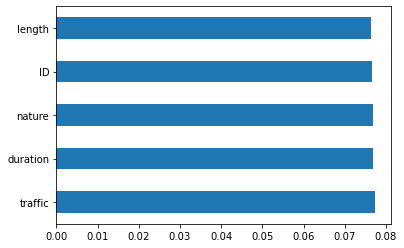

In [22]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:

feat_importances.nlargest(6).plot.barh(x='Features')

In [ ]:
feat_importances.nlargest(6)

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=features.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()